# Abstract 
The dataset that I have chosen is called "Are Your Employees Burning out?" The dataset portrays an understanding of what the burn rate might be for employees working from home during the pandemic for a product or service company. It gives an understanding of what factors might affect employee's burn rate. I chose this dataset because I was genuinely curious about how employees are feeling about working from home during a pandemic and whether or not they were they felt burned out because working remotely can cause mental fatigue and can cause stress as employers have much more expectations from the employees. After performing Linear Regression on this dataset, I plan on using Logistic Regression. Throughout this notebook, I plan to have a deeper understanding of what factors can affect an employee's burn rate while working from home during a pandemic. 

# Prepping the Regression Datasets 
The columns of this dataset display what other factors may affect the burn rate such as the date they joined the company, their gender, company type (service or product), WFH setup availability, which portrays if work from the home facility is available. Other factors include designation, which gives a number to the employee based on their designation of the work from an interval of [0,5] with 5 being the highest designation. Resource Allocation lists the amount of resource allocated to the employee to work such as the number of working hours from an interval of [1, 10] where a higher number indicates more resource. Mental Fatigue Score's interval is from [0,10],where 0.0 means no fatigue and 10.0 means completely fatigue. It describes the level of fatigue mentally the employee is facing. Lastly, there is burn rate which is the rate of burnout for each employee in the range of [0,1] where a higher value indicates more burnout. 


Here are the first 15 rows of my dataset. The rows that I will be working with for Linear Regression are "Burn Rate" and "Mental Fatigue Score". To recap, the mental fatigue score's range is from [0, 10] while burn rate's interval is from [0,1] and a higher number indicates higher burn rate and mental fatigue of the employee while working from home based on their other factors. 


In [235]:
import pandas as pd

employeeburn = pd.read_csv("/Users/nisha/Desktop/dataset2/train.csv")

employeeburn.head(15)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,9/30/08,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,11/30/08,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,3/10/08,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,11/3/08,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,7/24/08,Female,Service,No,3,7.0,6.9,0.52
5,fffe3300350037003500,11/26/08,Male,Product,Yes,2,4.0,3.6,0.29
6,fffe33003300340039003100,1/2/08,Female,Service,No,3,6.0,7.9,0.62
7,fffe32003600320037003400,10/31/08,Female,Service,Yes,2,4.0,4.4,0.33
8,fffe32003200300034003700,12/27/08,Female,Service,No,3,6.0,NaN,0.56
9,fffe31003600320030003200,3/9/08,Female,Product,No,3,6.0,NaN,0.67


Since I only need the "Mental Fatigue Score" and "Burn Rate" columns. I printed them out to focus on that. 

In [236]:
#taking only the mental fatique score and burn rate columns
df_binary = df[['Mental Fatigue Score', 'Burn Rate']]
#displays the data table 
df_binary.head(15)

,Mental Fatigue Score,Burn Rate
0,3.8,0.16
1,5.0,0.36
2,2.6,0.20
3,6.9,0.52
4,3.6,0.29
5,7.9,0.62
6,4.4,0.33
7,5.3,0.50
8,1.8,0.12
9,5.8,0.51


Here is what the scatter plot looks like.Due to all the points it looks a bit cluttered. But the dots are there. 

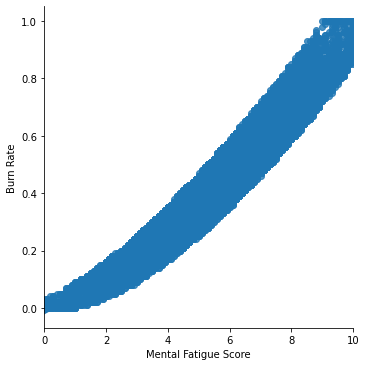

In [237]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#plots the data scatter 
sns.lmplot(x ="Mental Fatigue Score", y ="Burn Rate", data = df_binary, order = 2, ci = None)



# Linear Regression

0.8940083898542867


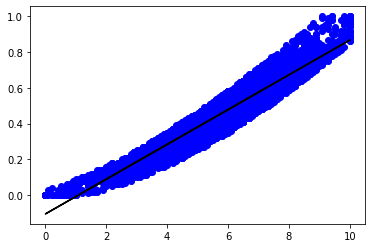

In [238]:

# # Converting each dataframe into a numpy array 
X = np.array(df_binary['Mental Fatigue Score']).reshape(-1, 1)
y = np.array(df_binary['Burn Rate']).reshape(-1, 1)

#drop any rows with NaN values
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

The regression score aka R^2 or our error rate is 0.8940083898542867. R^2 gives us information about how fit the model is. Our R^2 value is 0.8940083898542867 using the entire dataset. An R^2 of 1 indicates that the regression predictions perfectly fit the data. If we round up, our data model is about 90% accurate and so it fits into the existing model about 90%. Since this number is very close to 1, my regression is a good fit and very effective in how mental fatigue can affect burn rate. The graph displays that Burn rate and Mental Fatigue Score have a linear relationship. So as the Mental Fatigue Score increases burn rate of employees also increases.   

I wanted to see what the plot looks like a bit zoomed in. So I plotted the scaccer plot using less points from my dataset just to have a closer look. 

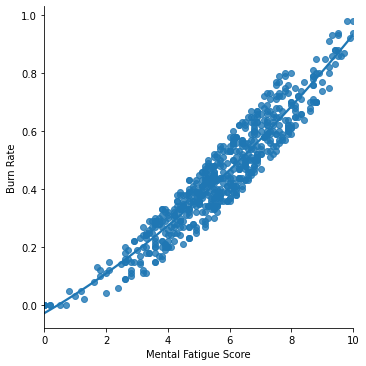

In [243]:
df_binary600 = df_binary[:][:600]
  
# Selecting the 1st 500 rows of the data
sns.lmplot(x ="Mental Fatigue Score", y ="Burn Rate", data = df_binary500,
                               order = 2, ci = None)




0.8930398982389869


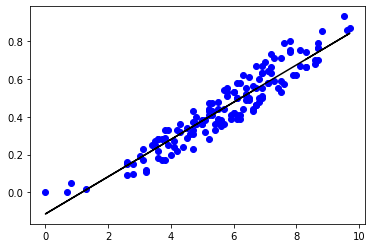

In [244]:
df_binary600.fillna(method ='ffill', inplace = True)
  
X = np.array(df_binary600['Mental Fatigue Score']).reshape(-1, 1)
y = np.array(df_binary600['Burn Rate']).reshape(-1, 1)
  
df_binary500.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
  
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()


Considering only the first 600 datasets actually didn't increase our regression value. It bought it down a bit. Therefore, using fewer vales didn't make out regression line more accurate. So, it can be concluded that the more data points we have the more accurate our regression will be in this case.

# Prepping the classification dataset

I am going to be using the same dataset to perform a model of Classification on the dataset. The classification I will be performing is Logistic Regression. I have dropped the first two columns, "Employee ID" and "Date of Joining" because I will not be working with those columns. I have also dropped all the rows that had Nan data. This was an important part of prepping the data as without doing this many problems would arise and our results wouldn't be accurate. I also filled in the missing values with the column mean. I did this for "Resource Allocation" and "Mental Fatigue Score". One last thing I did to prep this dataset is replaced all the strings with Binary encoding numbers. Here is what the clean data looks like for classification.  

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/nisha/Desktop/dataset2/train.csv")


df = df.copy()
df = df.drop(['Employee ID', 'Date of Joining'], axis=1)
# df = df.dropna(inplace = True) 

df = df.dropna()
df = df.reset_index(drop=True)
    
#     # Drop rows with missing target values
# missing_target_rows = df.loc[df['Burn Rate'].isna(), :].index
# df = df.drop(missing_target_rows, axis=0).reset_index(drop=True)
    
# Fill remaining missing values with column means
for column in ['Resource Allocation', 'Mental Fatigue Score']:
    df[column] = df[column].fillna(df[column].mean())
        

df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
df['Company Type'] = df['Company Type'].replace({'Product': 0, 'Service': 1})
df['WFH Setup Available'] = df['WFH Setup Available'].replace({'No': 0, 'Yes': 1})

df.head(15)
    



,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,0,1,0,2,3.0,3.8,0.16
1,1,1,1,1,2.0,5.0,0.36
2,1,1,1,1,1.0,2.6,0.20
3,0,1,0,3,7.0,6.9,0.52
4,1,0,1,2,4.0,3.6,0.29
5,0,1,0,3,6.0,7.9,0.62
6,0,1,1,2,4.0,4.4,0.33
7,1,0,1,2,3.0,5.3,0.50
8,1,1,1,0,1.0,1.8,0.12
9,1,0,1,1,3.0,5.8,0.51


Here's a summary of the data mapping:

Gender:           
0 = Female, 
1 = Male 

Company Type: 
Service: 1,
Product: 0

WFH Setup Allocation: 
No = 0,
Yes = 1



Splitting the dataset to train and test. 80% of data is used for training the model and 20% of it is used to test the performance of our model.


# Classification with a Logistic Regression

In [249]:
X = df[['Burn Rate','Mental Fatigue Score','Gender','Resource Allocation','Designation','WFH Setup Available']]

y = df['Company Type']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)



Feature scaling is a method used to normalize the range of independent variables or features of data. Though I didn't really have to perform feature scaling here, I did it anyways to see what the values can potentially look like. 

In [251]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train) 
x_test = sc_x.transform(xtest)
  
print (x_train[0:5, :])

[[ 1.05229064 -1.39265566 -1.08980123  0.72121416  1.22037517  1.17533276]
 [ 1.05229064  0.71805259 -1.08980123  0.72121416  1.22037517  0.34488286]
 [-0.95030779  0.71805259  0.91759852 -0.15858003 -0.72502508 -0.27795457]
 [ 1.05229064  0.71805259 -1.08980123  0.72121416  0.24767504  0.76010781]
 [ 1.05229064  0.71805259 -1.08980123 -0.15858003  0.24767504  0.29297974]]


Here I am training my Logistic Regression model. 

In [250]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

In [ ]:
Now we need to measure the perforace of the model. We do this by Confision Matrix. 

Predicted     1
Actual         
0          1344
1          2374


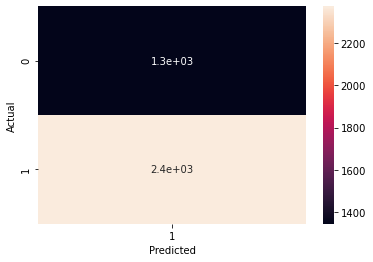

In [254]:
import seaborn as sn
from sklearn import metrics
import matplotlib.pyplot as plt

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)
sn.heatmap(confusion_matrix, annot=True)
plt.show()


In [253]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.6385153308230231


Through this logistic regression, I trained the datasets to predicts the company Type based on the data given. Gien 'Burn Rate', 'Mental Fatigue Score', 'Gender', 'Resource Allocation', 'Designation' and 'WFH Setup Available' the logistic regression is predicting whether or not the employee works at a service company or a product company. 0 indicates a product company and 1 indicates a service company. The error rate is 0.6385153308230231. Since it's above 60 it is somewhat accurate but can definitely improve. 


# Conclusion

The relationship between burn rate and mental fatigue score of employees is linear. So as one increases the other also increases. The error rate of my regression was pretty close to 1 so it was a good fit. One thing I discovered is that if you want better accuracy or change of the regression value then playing with the size of the dataset may work. My logistic regression is predicting which type of company the employee works for based on the given columns such as burn rate, mental fatigue, etc. My error rate was about 64% accurate. In other words, my logistic regression model was able to successfully predict the company type based on burn rate, mental fatigue, etc 64%. To extend this project further, I would like to perform another classification model on my dataset and see if it can predict the burn rate or it can categorize the burn rate to describe which employees are more burned out than the others. It is really interesting to see that employees working from home feel burned out. This dataset really highlighted how important it is to take care of your mental health while working from home in the middle of a pandemic. It brings a great awareness that employers should be aware of the workload while assigning their employees work. The work should be doable within a certain period of time without stressing out the student. This also goes to students as professors assign more work to students as they think students have more time in their hands since they are at home. Mental health is often overlooked by employers and professors. 


